In [75]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# A Tutorial on Statistical-Learning for Scientifi Data Processing

## Contents
- Statistical Learning: The setting and the Estimator Object in Scikit-learn
    - Datasets
    - Estimator Objects
- Supervised Learning: Predicting an Output Variable from High-dimensional Observations
    - Nearest neighbour and the Curse of Dimensionality
    - Linear Model: From Regression to Sparsity
    - Support Vector Machines (SVMs)
- Model Selection: Choosing estimators and their Parameters
    - Score, and Cross-validated estimators
    - Cross-validation Generators
    - Grid-search and Cross-validated estimators
- Unsupervised Learning: Seeking Representations of the Data
    - Clustering: Grouping Obeservations Together
    - Decompositions: From a Signal to Components and Loadings
- Putting it all Together
    - Pipelining
    - Face Recognition with Eigenfaces
    - Open Problem: Stock Market Structure

## Statistical Learning: The Setting and the Estimator Object in Scikit-Learn

### Datasets

In [2]:
# Importing necessary libraries
from sklearn import datasets

In [3]:
# Get data
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

(1797, 8, 8)


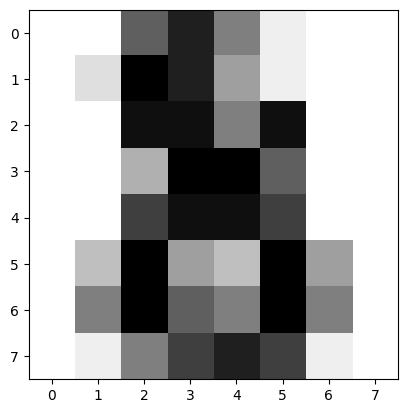

In [7]:
# Get data
digits = datasets.load_digits()
print(digits.images.shape)

# Importing encessary libraries
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],
    cmap=plt.cm.gray_r)

In [8]:
# Reshape data
data = digits.images.reshape(digits.images.shape[0], -1)

### Estimator Objects

In [12]:
# Fitting data
estimator.fit(data)

NameError: name 'estimator' is not defined

In [13]:
# Estimator parameters
estimator = Estimator(param1=1, param2=2)
estimator.param2

NameError: name 'Estimator' is not defined

In [14]:
# Estimated parameters
estimator.estimated_param_

NameError: name 'estimator' is not defined

## Supervised Learning: Predicting an Output Variable from High-dimensional Observations

### Nearest neighbour and the Curse of Dimensionality

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn import datasets

In [ ]:
# Get data
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [39]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [48]:
# Import data
iros = datasets.load_iris()
X = iris.data[:, :2] #Only using the first two features
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

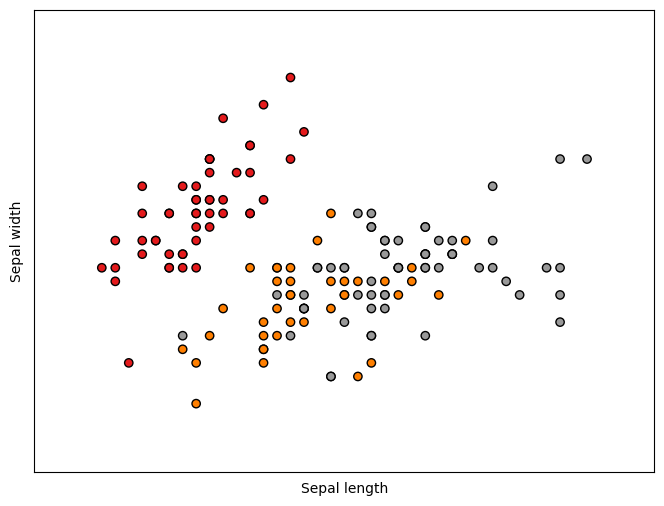

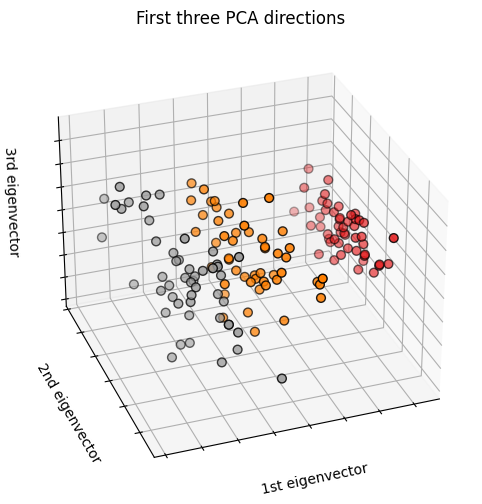

In [51]:
# Plot data
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To get a better understanding og interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40
)

ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.zaxis.set_ticklabels([])

plt.show()

In [53]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

# Create and fit a nearest-neighbour classifier
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
print(KNeighborsClassifier())
knn.predict(iris_X_test)
print(knn.predict(iris_X_test))
print(iris_y_test)

KNeighborsClassifier()
[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [52]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [54]:
# Set up
n_neighbors = 15

# Import data
iris = datasets.load_iris()

# Get relevant data from dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

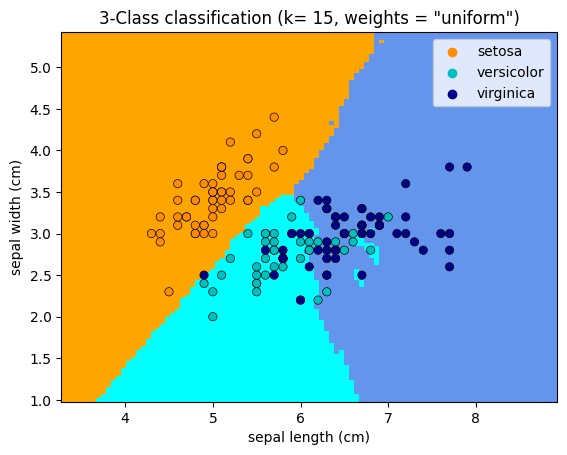

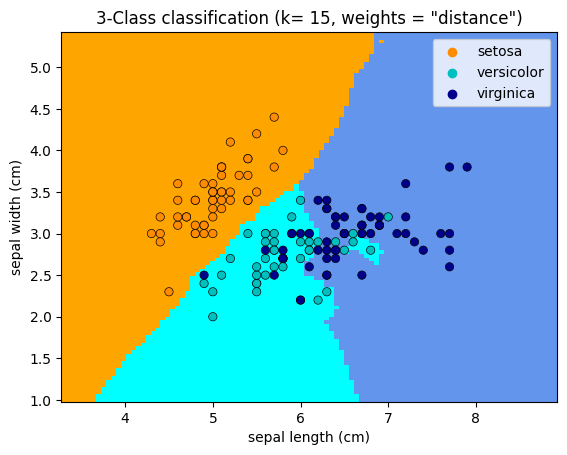

In [55]:
#Creating plot, creating Neighbour classifier, and fit the data
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method='predict',
        plot_method='pcolormesh',
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading='auto'
    )

    # Plotting the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor='black'
    )

    plt.title(
        '3-Class classification (k= %i, weights = "%s")' % (n_neighbors, weights)
    )

plt.show()


### Linear Model: From Regression to Sparsity

In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split data into training and testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training and testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: %.2f {mean_squared_error(diabetes_y_test, diabetes_y_pred)}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: %.2f {r2_score(diabetes_y_test, diabetes_y_pred)}')

Coefficients: [938.23786125]
Mean squared error: %.2f 2548.07239872597
Coefficient of determination: %.2f 0.47257544798227147


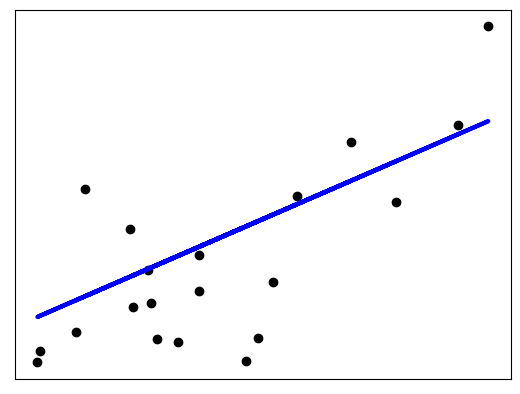

In [9]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
# Importing necessary libraries
from sklearn import datasets
from sklearn import linear_model
import numpy as np

In [3]:
# Get data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [6]:
# Create regressor model and fit data onto model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# Coefficients
print(regr.coef_)
# The mean squared error
print(np.mean(regr.predict(diabetes_X_test) - diabetes_y_test)** 2)
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(regr.score(diabetes_X_test, diabetes_y_test))

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
194.3471972290699
0.585085427447195


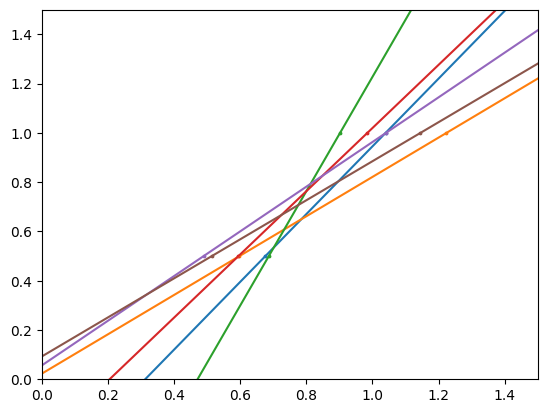

In [15]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

# Importing necessary libraries
import matplotlib.pyplot as plt

plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

plt.ylim(0,1.5)
plt.xlim(0,1.5)
plt.show()

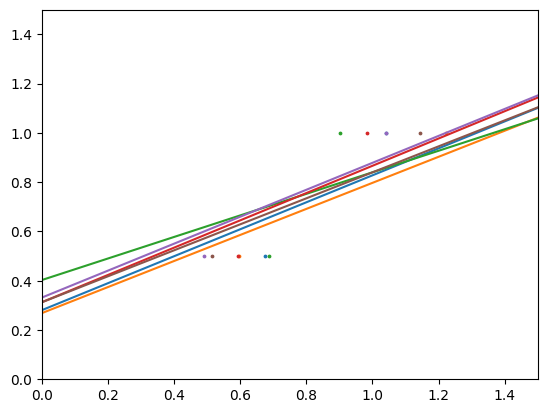

In [18]:
# Ridge regression
regr = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)

for _ in range(6):
    this_X = .1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

plt.ylim(0,1.5)
plt.xlim(0,1.5)
plt.show()

In [20]:
# Chosing alpha to minimize left out error using diabetes dataset
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
        for alpha in alphas])

[0.5851211547549657, 0.5852172781570942, 0.5854773661274459, 0.5855599854998632, 0.583079520872396, 0.5705970628037382]


In [21]:
# Sparcity example: fitting only features 1 and 2
# Importing necessary libraries
from sklearn import datasets
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Loading Data
X, y = datasets.load_diabetes(return_X_y=True)
indices = (0,1)

# Split data into training and test sets
X_train = X[:-20, indices]
X_test = X[-20:, indices]
y_train = y[:-20,]
y_test = y[-20:]

In [24]:
# Create empty model and fit data onto model
ols = linear_model.LinearRegression()
_ = ols.fit(X_train, y_train)

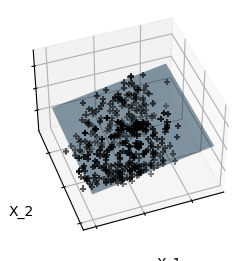

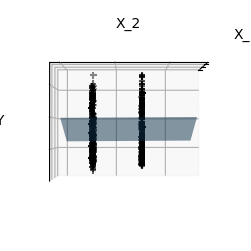

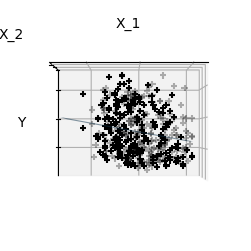

In [29]:
# Plot figure from three different views
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4,3))
    plt.clf()
    ax = fig.add_subplot(111, projection='3d', elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(
        np.array([[-0.1, -0.1], [0.15, 0.15]]),
        np.array([[-0.1, 0.15], [-0.1, 0.15]]),
        clf.predict(
            np.array([[-0.1, -0.1, 0.15, 0.15], [-0.1, 0.15, -0.1, 0.15]]).T
        ).reshape((2, 2)),
        alpha=0.5,
    )
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

# Generate the three different figures from different views
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -0.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -0.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()

In [30]:
# Using sparse method Lasso
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)        
              .score(diabetes_X_test, diabetes_y_test)
        for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[   0.         -212.4341158   517.20105983  313.77231942 -160.82780155
   -0.         -187.19532359   69.38062294  508.65764425   71.8438046 ]


In [31]:
# Logistic function example

# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

In [57]:
# Generate a toy dataset
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

In [58]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0)

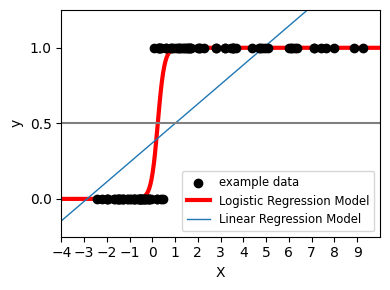

In [68]:
# Plot the result
from importlib import reload
reload(plt)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)

plt.axhline(0.5, color=".5")

plt.xlabel("X")
plt.ylabel('y')

plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

In [69]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [70]:
# Import data
iris = datasets.load_iris()
X = iris.data[:, :2] # The first two features
y = iris.target

In [71]:
# Create an instance of Logistic Regression Classifier
# and it the dato onto the model
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

LogisticRegression(C=100000.0)

c:\Python39\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


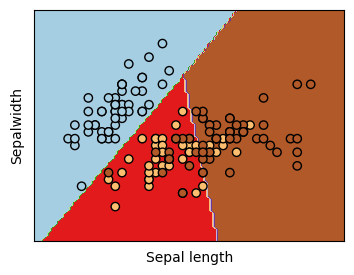

In [72]:
# Plot data
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method='predict',
    shading='auto',
    xlabel='Sepal length',
    ylabel='Sepalwidth',
    eps=0.5
)

# Plot the training points as well
plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

### Support Vector Machines (SVMs)

In [88]:
# Plot SVM Margins Example

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

<IPython.core.display.Javascript object>

In [82]:
# Create data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Figure number
fignum = 1

<IPython.core.display.Javascript object>

C:\Users\mcvk\AppData\Local\Temp\ipykernel_34740\1786295068.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\mcvk\AppData\Local\Temp\ipykernel_34740\1786295068.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


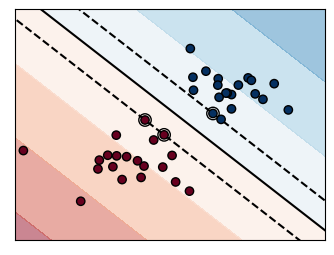

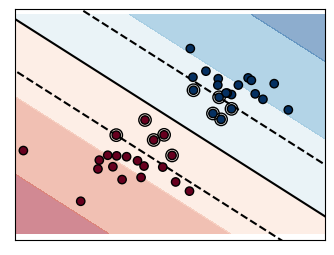

<IPython.core.display.Javascript object>

In [93]:
# Fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # Get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # Plot the parallels to the separating hyperplane that pass though the
    # support vectors (margin away from hyperplane in direction perpendicular
    # to hyperplane). This is sqrt(1+a^2) away vertically in 2-d
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # Plot the time, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors='none',
        zorder=10,
        edgecolors='k',
        cmap=cm.get_cmap("RdBu")
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap('RdBu'), edgecolors='k'
    )

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap('RdBu'), alpha=0.5, linestyles=['-'])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum += 1

plt.show()

In [94]:
# SVM-Kernels example

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

<IPython.core.display.Javascript object>

In [95]:
# Create data
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

<IPython.core.display.Javascript object>

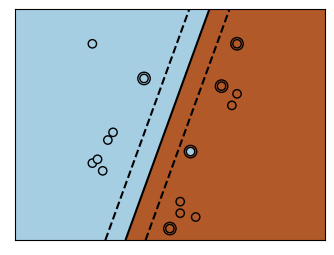

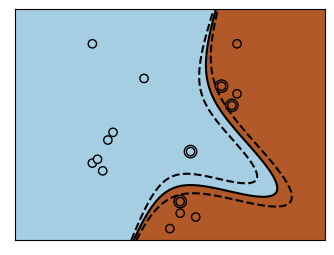

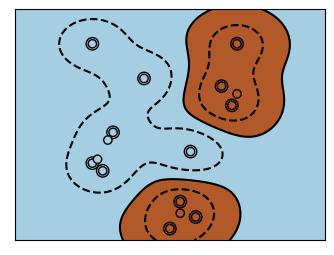

<IPython.core.display.Javascript object>

In [103]:
# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum += 1

plt.show()

## Model Selection: Choosing estimators and their Parameters

### Score, and Cross-validated estimators

### Cross-validation Generators

### Grid-search and Cross-validated estimators

## Unsupervised Learning: Seeking Representations of the Data

### Clustering: Grouping Obeservations Together

### Decompositions: From a Signal to Components and Loadings

## Putting it all Together

### Pipelining

### Face Recognition with Eigenfaces

### Open Problem: Stock Market Structure